Import all the libraries that are necessary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Challenge 1

Open the Employee.csv file and name your dataset employee

In [2]:
employee = pd.read_csv('./employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


What's the mean salary by department. <br/>
Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways.

In [3]:
## without pivot tables

employee.groupby('Department').mean()['Salary'].reset_index()

,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


In [4]:
## with pivot tables

employee.pivot_table(index=["Department"], values=["Salary"])

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [5]:
employee.pivot_table(index=["Department", "Title"], values=["Salary"])

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table <br/>
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
employee.pivot_table(index=['Title'], columns=['Years'], values=['Salary'], fill_value=0) 

Salary                    
Years          1   2   3   4   7   8
Title                               
VP             0   0   0   0   0  70
analyst       35  30   0  35   0   0
associate      0  55  55   0  60   0

We want to know the information about the mean salary and number of employees in each department and for each job title


In [7]:
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], 
                     aggfunc={'Title': 'count', 'Salary': np.mean})

Salary  Title
Department Title                   
HR         VP           70.0      1
           analyst      32.5      2
IT         VP           70.0      1
           analyst      32.5      2
           associate    60.0      1
Sales      associate    55.0      2

We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results


In [8]:
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], 
                     aggfunc={'Salary': [np.median, min, max, np.std]})

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70       NaN
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70       NaN
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60       NaN
Sales      associate     55   55.0  55  0.000000

Based on your comments, fill the missing values with an appropriate value

In [9]:
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], 
                     aggfunc={'Salary': [np.median, min, max, np.std]}, fill_value=0)

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000

The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information?


In [10]:
employee.pivot_table(index=['Department'], values=['Title', 'Salary'], 
                     aggfunc={'Title': 'count', 'Salary': np.sum}).rename(columns={'Title': 'Number of employees', 
                                                                                   'Salary': 'Amount spent on salaries'})

,Amount spent on salaries,Number of employees
Department,,
HR,135,3
IT,195,4
Sales,110,2


For each Department and Title, we want to know the total years of work experience and the mean salary

In [11]:
employee.pivot_table(index=['Department', 'Title'], values=['Years','Salary'], 
                     aggfunc={'Years': np.sum, 'Salary': np.mean})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

Bonus

We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table <br/>
*Hint: Write a custom function*

In [13]:
def menos_maximos(x):
    max=x.max()
    x.drop(x[x==max].index[0], inplace=True)

    return x.mean()

employee.pivot_table(index = ['Department'], values = ['Salary'], aggfunc = menos_maximos)

,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


In [14]:
employee.pivot_table(index=['Department'], values=['Salary'], 
                     aggfunc=lambda x: (x.sum() - x.max())/(len(x)-1))

,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


## Challenge 2

Open the Fitbit.csv file and name your dataset fitbit

In [15]:
fitbit = pd.read_csv('./fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


Explore you dataset in terms of data types and descriptive statistics <br/>
*Hint: Use Pandas functions from previous lectures*

In [16]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [17]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [18]:
fitbit['Steps'].corr(fitbit['Minutes Very Active'])

0.5714518481062608

Use matplotlib to visually plot Minutes Very active vs Steps. <br/>
*Hint : import matplotlib.pyplot as plt (See previous lessons)* <br/>
    Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

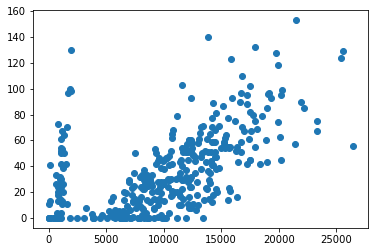

In [17]:
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Very Active'])

What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
## It seems that most of the people in this dataset get around 10 minutes of being very active
## when they do 8,000 steps. It also seems like the champion of this group is the person
## in the chart that walked more than 25,000 steps in around 60 minutes of being very active.

We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [19]:
fitbit['Steps'].corr(fitbit['Minutes Sedentary'])

0.07690608062990094

Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

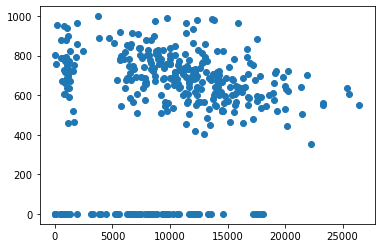

In [20]:
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Sedentary'])

We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [21]:
fitbit['Steps'].corr(fitbit['MinutesOfSleep'])

0.13098565950836386

Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

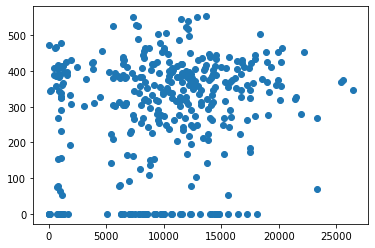

In [22]:
plt.scatter(x=fitbit['Steps'], y=fitbit['MinutesOfSleep'])

Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable cor_fit

In [23]:
columns = ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [24]:
cor_fit = fitbit[columns].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps? <br/>
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [25]:
cor_fit['Steps'].sort_values()

Minutes Sedentary      0.076906
MinutesOfSleep         0.130986
Calorie burned         0.255305
Floors                 0.306511
Minutes Very Active    0.571452
Steps                  1.000000
Name: Steps, dtype: float64

## Challenge 3

Open the Time_Grades.csv file and name your dataset time_grades

In [26]:
time_grades = pd.read_csv('./Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


Show visually the frequency distribution of the time_grades dataset.

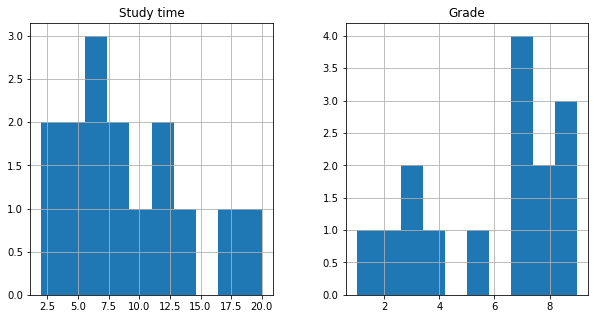

In [28]:
time_grades.hist(figsize=(10,5))
plt.show()

Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation


In [30]:
time_grades.corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [31]:
time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [ ]:
## They are correlated, but the spearman results in a slightly higher correlation coefficient.

Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

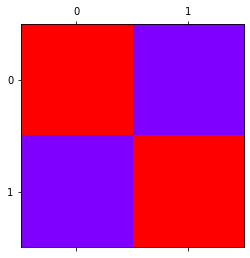

In [43]:
plt.matshow(time_grades.corr(), cmap='rainbow')
plt.show()

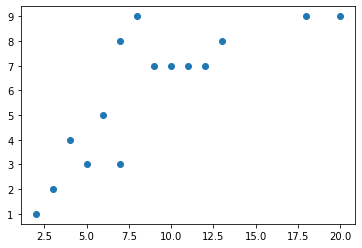

In [38]:
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])
plt.show()

Could you explain the difference between Pearson and Spearman correlation? (see References in README.md)

In [30]:
# Pearson correlation is mainly focused on measuring linear correlations. What this correlation attempts to 
# do is to establish a line that best fits two variables, laying out the expected values and the orrelation coefficient 
# which indicates how far away the actual dataset is from the expected values. 


# However, Spearman correlation measures relationships between variables that are not necessarily linear.
# In this type of correlation, one variable can increase as well as the other, 
## but this increase doesn't need to be represented by a linear relationship.